In [1]:
import Optimizer as opt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
indep_var = np.random.normal(size = (100,2))
data = pd.DataFrame(data = indep_var, columns = ['indep_var1','indep_var2'])
data['dep_var'] = 2*data.indep_var1 + 3*data.indep_var2+np.random.normal(loc = 0, scale = 2, size=(len(data)))
data.head()

,indep_var1,indep_var2,dep_var
0,0.356285,-1.207943,-2.720853
1,1.452898,-0.938499,-3.248860
2,-0.305245,2.367370,1.781009
3,0.057890,1.548689,4.788212
4,-0.436097,1.459242,3.649255


In [24]:
class Model(object):
    def __init__(self, data):
        self.data = data
        self.all_data = data
        self.row_idx = 0
    
    def make_stochastic(self):
        self.stochastic = True
        self.row_idx = 0
        self.data = self.all_data.iloc[self.row_idx,:]
    
    def make_deterministic(self):
        self.data = self.all_data
        
    def step(self):
        if self.row_idx < len(self.all_data) - 1:
            self.row_idx += 1
        else:
            self.row_idx = 0
        self.data = self.all_data.iloc[self.row_idx,:]
        print(self.data)
        
    def predict(self):
        raise NotImplementedError
        
    def loss(self):
        raise NotImplementedError

In [25]:
def minimize_over_data(model, init_param, method, epochs, stochastic = False, **kwargs):
    if stochastic:
        x = np.array(init_param)
        val_rec = [x]
        model.make_stochastic()
        for epoch in range(epochs):
            for rows in range(len(model.all_data)):
                r = opt.minimize(model.loss, x, method = method, max_iter = 1, **kwargs)
                x = r.x
                val_rec.append(r.x)
                model.step()
        model.make_deterministic()
        r = opt.Result(x, val_rec, None, None)
    else:
        x = init_param
        val_rec = [x]
        r = opt.minimize(model.loss, x, method = method, max_iter = epochs, **kwargs)
    return r

In [31]:
class MSE_Regression(Model):
    def __init__(self, data):
        super().__init__(data)
    
    def predict(self, beta1, beta2):
        return self.data['indep_var1']*beta1 + self.data['indep_var2']*beta2
    
    def loss(self, beta1, beta2):
        prediction = self.predict(beta1, beta2)
        return np.sum((prediction-self.data['dep_var'])**2)

In [32]:
model = MSE_Regression(data)

In [33]:
r_all = minimize_over_data(model, [10,10], 'Gradient Descend', 300, stochastic = False, lr = 1e-4)
r_all.x

array([1.98622902, 2.99529559])

In [34]:
r_stoch = minimize_over_data(model, [10,10], 'Gradient Descend', 10, stochastic = True, lr = 1e-3)
r_stoch.x

indep_var1    1.452898
indep_var2   -0.938499
dep_var      -3.248860
Name: 1, dtype: float64
indep_var1   -0.305245
indep_var2    2.367370
dep_var       1.781009
Name: 2, dtype: float64
indep_var1    0.057890
indep_var2    1.548689
dep_var       4.788212
Name: 3, dtype: float64
indep_var1   -0.436097
indep_var2    1.459242
dep_var       3.649255
Name: 4, dtype: float64
indep_var1    0.812558
indep_var2   -1.184761
dep_var      -2.231906
Name: 5, dtype: float64
indep_var1   -0.692780
indep_var2    1.011361
dep_var      -1.180691
Name: 6, dtype: float64
indep_var1   -0.147202
indep_var2   -0.105533
dep_var       1.249630
Name: 7, dtype: float64
indep_var1   -0.404679
indep_var2    1.081090
dep_var       0.561698
Name: 8, dtype: float64
indep_var1    1.282258
indep_var2   -1.343892
dep_var      -3.501230
Name: 9, dtype: float64
indep_var1    0.570667
indep_var2   -1.519145
dep_var      -3.302619
Name: 10, dtype: float64
indep_var1    1.186185
indep_var2   -0.676431
dep_var       1.445136


Name: 91, dtype: float64
indep_var1    0.003225
indep_var2    0.152448
dep_var      -0.169304
Name: 92, dtype: float64
indep_var1    0.720723
indep_var2    1.870398
dep_var       7.212719
Name: 93, dtype: float64
indep_var1    0.823188
indep_var2   -0.613211
dep_var      -1.298357
Name: 94, dtype: float64
indep_var1   -0.618159
indep_var2   -0.240078
dep_var      -1.556763
Name: 95, dtype: float64
indep_var1    0.949662
indep_var2    0.102580
dep_var       2.504489
Name: 96, dtype: float64
indep_var1   -1.460611
indep_var2    1.079303
dep_var      -2.234581
Name: 97, dtype: float64
indep_var1   -1.954122
indep_var2    1.490106
dep_var      -1.927277
Name: 98, dtype: float64
indep_var1   -1.559486
indep_var2   -0.843894
dep_var      -7.986770
Name: 99, dtype: float64
indep_var1    0.356285
indep_var2   -1.207943
dep_var      -2.720853
Name: 0, dtype: float64
indep_var1    1.452898
indep_var2   -0.938499
dep_var      -3.248860
Name: 1, dtype: float64
indep_var1   -0.305245
indep_var2    

Name: 41, dtype: float64
indep_var1   -0.175987
indep_var2   -0.307535
dep_var      -2.407985
Name: 42, dtype: float64
indep_var1    0.885099
indep_var2   -0.464787
dep_var       0.397951
Name: 43, dtype: float64
indep_var1    0.486229
indep_var2   -0.514576
dep_var       2.158737
Name: 44, dtype: float64
indep_var1    0.204254
indep_var2    1.694578
dep_var       6.142011
Name: 45, dtype: float64
indep_var1   -0.810064
indep_var2   -0.753950
dep_var      -4.254264
Name: 46, dtype: float64
indep_var1    0.842637
indep_var2    1.553405
dep_var       7.405929
Name: 47, dtype: float64
indep_var1   -1.218676
indep_var2   -1.009034
dep_var      -3.745489
Name: 48, dtype: float64
indep_var1   -1.533902
indep_var2    0.295290
dep_var      -0.748702
Name: 49, dtype: float64
indep_var1   -1.224978
indep_var2    0.505529
dep_var      -2.384947
Name: 50, dtype: float64
indep_var1   -0.243236
indep_var2   -0.985422
dep_var      -4.454892
Name: 51, dtype: float64
indep_var1   -0.571076
indep_var2  

Name: 56, dtype: float64
indep_var1   -0.238872
indep_var2   -0.076323
dep_var       1.302667
Name: 57, dtype: float64
indep_var1   -0.474966
indep_var2    0.239822
dep_var      -0.466878
Name: 58, dtype: float64
indep_var1   -0.367140
indep_var2    0.289356
dep_var      -1.915601
Name: 59, dtype: float64
indep_var1   -0.056905
indep_var2   -0.628454
dep_var      -1.000653
Name: 60, dtype: float64
indep_var1    0.768688
indep_var2    0.663677
dep_var       6.222096
Name: 61, dtype: float64
indep_var1    0.071067
indep_var2   -0.310990
dep_var      -0.409158
Name: 62, dtype: float64
indep_var1    0.903297
indep_var2    0.367833
dep_var       1.107756
Name: 63, dtype: float64
indep_var1    0.369894
indep_var2   -0.504796
dep_var      -0.348747
Name: 64, dtype: float64
indep_var1   -0.297390
indep_var2    0.637867
dep_var      -0.190282
Name: 65, dtype: float64
indep_var1    1.087311
indep_var2   -2.146722
dep_var      -3.264584
Name: 66, dtype: float64
indep_var1   -0.614356
indep_var2  

Name: 99, dtype: float64
indep_var1    0.356285
indep_var2   -1.207943
dep_var      -2.720853
Name: 0, dtype: float64


array([2.03380826, 2.96126782])

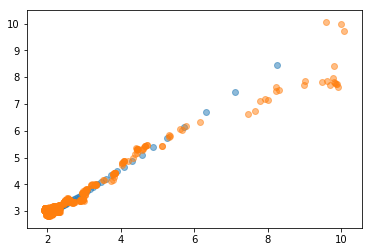

In [30]:
plt.scatter(np.array(r_all.val_rec)[:,0],np.array(r_all.val_rec)[:,1], alpha = .5)
plt.scatter(np.array(r_stoch.val_rec)[:,0],np.array(r_stoch.val_rec)[:,1], alpha = .5)